# CONVOLUTION BASIC -20MAI0010


In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from skimage import io
from scipy.signal import convolve2d



In [3]:
#loading the image
image="E:/AI & ML NEHA/winter main/deep learning/cars.jpg"

# Using 3x3 filter and 5x5 filter (box)

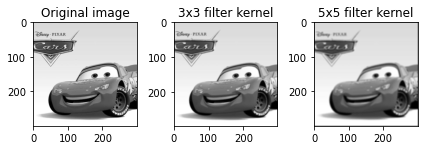

In [4]:

img = io.imread(image, as_gray=True)

# define first filter
filter01 = np.array([[1,  1, 1],
                     [1, 1, 1],
                     [1,  1, 1]])

# define first filter
filter02 = np.array([[1,  1, 1,1,1],
                     [1, 1, 1,1,1],
                     [1,  1, 1,1,1],
                     [1,  1, 1,1,1],
                     [1,  1, 1,1,1]])

# apply filters
out01 = convolve2d(img, filter01, mode="valid")
out02 = convolve2d(img, filter02, mode="same")

plt.subplot(131)
plt.title('Original image')
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('3x3 filter kernel')
plt.imshow(out01, cmap='gray')

plt.subplot(133)
plt.title('5x5 filter kernel')
plt.imshow(out02, cmap='gray')

plt.tight_layout()

In [5]:
img.shape

(300, 300)

Entropy for 3x3: 12.088275361651467


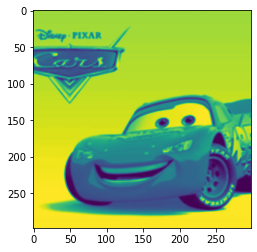

In [6]:
import skimage.measure
plt.imshow(out01)
entropy = skimage.measure.shannon_entropy(out01)
print("Entropy for 3x3:",entropy)

Entropy for 5x5: 12.727268670146396


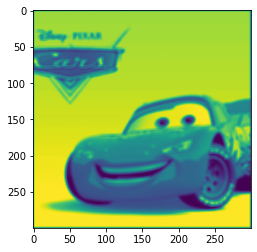

In [7]:
plt.imshow(out02)
entropy = skimage.measure.shannon_entropy(out02)
print("Entropy for 5x5:",entropy)

# Zero padding for 3x3 kernel

In [8]:
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.array([[1,  1, 1],
                     [1, 1, 1],
                     [1,  1, 1]])    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    
    # Add zero padding to the input image 
    image_padded = np.zeros((image.shape[0] + (kernel.shape[0]-1), 
                             image.shape[1] + (kernel.shape[1]-1)))   
    image_padded[(kernel.shape[0]//2):-(kernel.shape[0]//2), 
                 (kernel.shape[1]//2):-(kernel.shape[1]//2)] = image
    
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            
            output[y,x]=(kernel*image_padded[y:y + kernel.shape[0], x:x + kernel.shape[1]]).sum()
    return output





[[ 865.8412 1298.7618 1298.7618 1298.7618 1298.7618]
 [1299.7618 1949.6427 1949.6427 1949.6427 1949.6427]
 [1301.7618 1952.6427 1952.6427 1952.6427 1952.6427]
 [1301.7618 1952.6427 1952.6427 1952.6427 1952.6427]
 [1303.7618 1955.6427 1955.6427 1955.6427 1955.6427]]


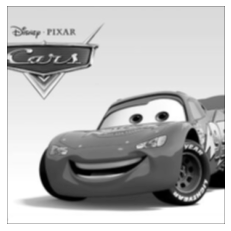

In [9]:
import numpy as np
from functools import reduce # Need this to get number of elements in kernel



kernel =np.array([[1,  1, 1],
                     [1, 1, 1],
                     [1,  1, 1]]) 
k_elements = reduce(lambda x, y: x * y, np.shape(kernel))
kernel = kernel/k_elements
cnvlvd_img = convolve2d(img,kernel)
print( cnvlvd_img[:5,:5]*255)

# Plot the filtered image
plt.imshow(cnvlvd_img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Zero padding for 5x5 kernel

In [10]:
def fiveconvolve2d(image, kernel):
   
    
    kernel = np.array([[1,  1, 1,1,1],
                     [1, 1, 1,1,1],
                     [1,  1, 1,1,1],
                     [1,  1, 1,1,1],
                     [1,  1, 1,1,1]])

   
    output = np.zeros_like(image)            
    
    # Add zero padding to the input image 
    image_padded = np.zeros((image.shape[0] + (kernel.shape[0]-1), 
                             image.shape[1] + (kernel.shape[1]-1)))   
    image_padded[(kernel.shape[0]//2):-(kernel.shape[0]//2), 
                 (kernel.shape[1]//2):-(kernel.shape[1]//2)] = image
    
    for x in range(image.shape[1]):    
        for y in range(image.shape[0]):
            # convolution
            output[y,x]=(kernel*image_padded[y:y + kernel.shape[0], x:x + kernel.shape[1]]).sum()
            
    return output





[[1949.6427 2599.5236 3249.4045 3249.4045 3249.4045]
 [2600.5236 3467.3648 4334.206  4334.206  4334.206 ]
 [3251.4045 4335.206  5419.0075 5419.0075 5419.0075]
 [3257.4045 4343.206  5429.0075 5429.0075 5429.0075]
 [3260.4045 4347.206  5434.0075 5434.0075 5434.0075]]


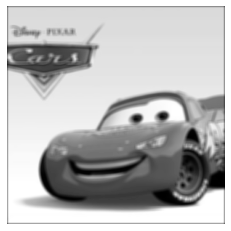

In [11]:
import numpy as np
from functools import reduce 



kernel =np.array([[1,  1, 1,1,1],
                     [1, 1, 1,1,1],
                     [1,  1, 1,1,1],
                     [1,  1, 1,1,1],
                     [1,  1, 1,1,1]])

k_elements = reduce(lambda x, y: x * y, np.shape(kernel))
kernel = kernel/k_elements
cnvlvd_img2 = fiveconvolve2d(img,kernel)
print( cnvlvd_img2[:5,:5]*255)

# Plot the filtered image
plt.imshow(cnvlvd_img2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [12]:

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

# 3x3 and 5x5 Filter with strides and zero padding 

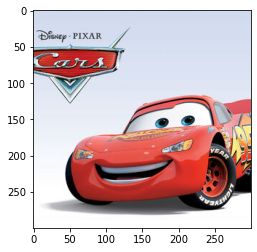

In [13]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D
import skimage.measure 
image=Image.open('E:/AI & ML NEHA/winter main/deep learning/cars.jpg')
plt.imshow(image)


In [14]:
rsize = image.resize((np.array((15,15))).astype(int))
image = np.asarray(rsize)
image.shape

(15, 15, 3)

In [15]:
x=image.reshape(1,15,15,3)

In [16]:
def Convolution(x,kernel_size,strides=1, padding='valid'):
 model=Sequential()
 model.add(Conv2D(1, kernel_size=kernel_size,strides=strides,padding=padding,input_shape=(15,15,3)))
 yhat = model.predict(x)
 y=yhat.reshape(yhat.shape[1],yhat.shape[2])
 filtered_image = Image.fromarray(y)
 return filtered_image

# 3x3 and stride=2

In [17]:
three_stride2=Convolution(x,(3,3),2)

Entropy of 3x3 and stride 2: 5.517671323662894


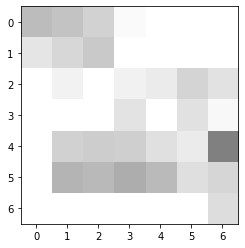

In [18]:
plt.imshow(three_stride2)
entropy = skimage.measure.shannon_entropy(three_stride2)
print("Entropy of 3x3 and stride 2:",entropy)

# 5x5 and stride=2

In [19]:
five_stride2=Convolution(x,(5,5),2)

Entropy of 5x5 and stride=2: 5.169925001442313


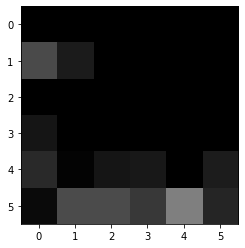

In [20]:
plt.imshow(five_stride2)
entropy = skimage.measure.shannon_entropy(five_stride2)
print("Entropy of 5x5 and stride=2:",entropy)

# 3x3 stride=1 zero padding

In [21]:
three_onestride_zeropad=Convolution(x,(3,3),1,'same')

Entropy of 3x3 and stride=1 and zero pad: 7.6416520536472605


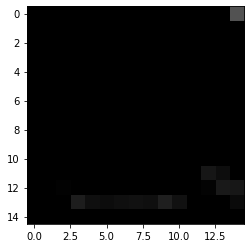

In [22]:
plt.imshow(three_onestride_zeropad)
entropy = skimage.measure.shannon_entropy(three_onestride_zeropad)
print("Entropy of 3x3 and stride=1 and zero pad:",entropy)

# 5x5 stride=1 and zero padding

In [23]:
five_strideone_zeropad=Convolution(x,(5,5),1,'same')


Entropy of 5x5 and stride=1 and zero pad: 7.771515524531144


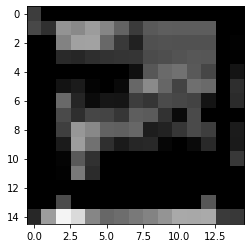

In [24]:
plt.imshow(five_strideone_zeropad)
entropy = skimage.measure.shannon_entropy(five_strideone_zeropad)
print("Entropy of 5x5 and stride=1 and zero pad:",entropy)

# Establishing convolution and maxpooling layers

In [25]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(366,424,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),input_shape=(366,424,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),input_shape=(366,424,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(2,2),input_shape=(366,424,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 364, 422, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 182, 211, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 207, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 89, 103, 64)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 51, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 11, 64)        

https://github.com/nehrjv/Deep-Learning-lab-Assignment/tree/main/ASSESSMENT2